# Taller 4
## Jaime Andres Moreno Ramos
## 201415848

# Análisis de tiempo-frecuencia: transformadas de Fourier y Wavelets

###  12.1 Conceptos básicos de la serie de Fourier y la transformación de Fourier

#### Transformada rápida de Fourier

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import axes3d

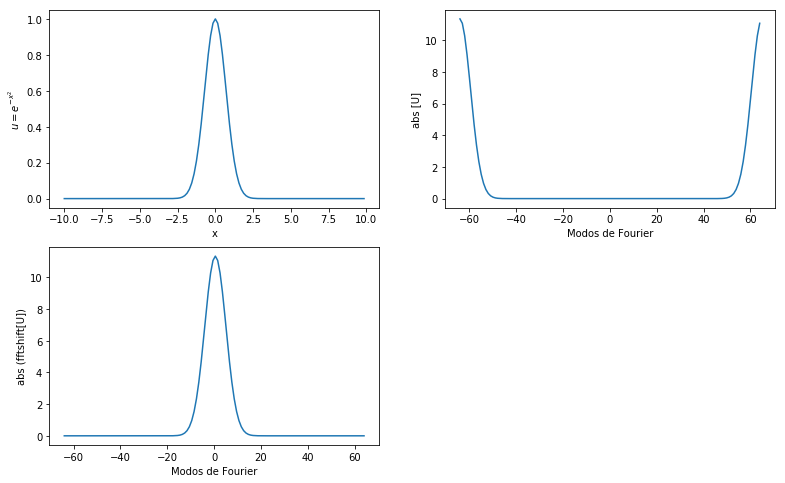

In [2]:
#Se define el dominio computacional [-L/2,L/2]
L=20
#Se define el número de modos de Fourier 2^n
n=128

x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
n_m=np.linspace(-n/2,n/2,n)

u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

pylab.figure(figsize=(13,8))
pylab.subplot(2,2,1)
pylab.xlabel("x")
pylab.ylabel ("$u=e^{-{x^{2}}}$")
pylab.plot(x,u)

pylab.subplot(2,2,2)
pylab.xlabel("Modos de Fourier")
pylab.ylabel ("abs [U]")
pylab.plot(n_m,abs(ut))

pylab.subplot(2,2,3)
pylab.xlabel("Modos de Fourier")
pylab.ylabel ("abs (fftshift[U])")
pylab.plot(n_m,abs(utshift))

Una representación gráfica del procedimiento FFT y sus propiedades de desplazamiento se ilustra a continuación, donde un Gaussiano se transforma y se desplaza por la rutina FFT.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


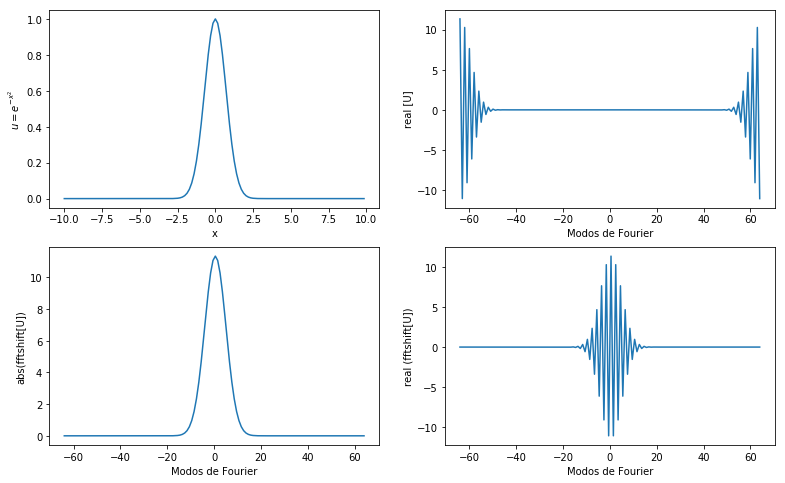

In [3]:
pylab.figure(figsize=(13,8))
pylab.subplot(2,2,1)
pylab.xlabel("x")
pylab.ylabel ("$u=e^{-{x^{2}}}$")
pylab.plot(x,u)

pylab.subplot(2,2,2)
pylab.xlabel("Modos de Fourier")
pylab.ylabel ("real [U]")
pylab.plot(n_m,ut)

pylab.subplot(2,2,4)
pylab.xlabel("Modos de Fourier")
pylab.ylabel ("real (fftshift[U])")
pylab.plot(n_m,utshift)

pylab.subplot(2,2,3)
pylab.xlabel("Modos de Fourier")
pylab.ylabel ("abs(fftshift[U])")
pylab.plot(n_m,abs(utshift))

Transformada rápida de Fourier U = fft (u) de datos gaussianos que ilustran las propiedades de desplazamiento de la rutina de FFT. Tenga en cuenta que el comando fftshift restaura la transformación a su estado matemáticamente correcto y sin desplazamiento.

#### FFT vs. Diferenciación de diferencia finita

In [4]:
#Se define el dominio computacional [-L/2,L/2]
L=20
#Se define el número de modos de Fourier 2^n
n=128

x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
n_m=np.linspace(-n/2,n/2,n)
dx=x[1]-x[0]
cosh=np.cosh(x)
sech=1/cosh
u=sech
ut=np.fft.fft(u)
positivo=np.linspace(0,n/2-1,n/2)
negativo=np.linspace(-n/2,-1,n/2)
k_1=(2*np.pi/L)*positivo
k_2=(2*np.pi/L)*negativo
k=np.concatenate((k_1,k_2))

# Calculo de derivadas FFT
ut1=1j*k*ut
ut2=-k*k*ut
u1=np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real
u1exact=-sech*np.tanh(x)
u2exact=sech-2*sech**3

#Calculación de la diferencia finitia de la primera derivada
    #2do orden
ux=[]
ux_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux.append(ux_1)
for j in range(1,n-1):
    ux_j=(u[j+1]-u[j-1])/(2*dx)
    ux.append(ux_j)
ux_f=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux.append(ux_f)

    #4to Orden
ux2=[]
ux2_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2.append(ux2_1)
ux2_2=(-3*u[1]+4*u[2]-u[3])/(2*dx)
ux2.append(ux2_2)
for j in range(2,n-2):
    ux2_j=((-u[j+2])+(8*u[j+1])-(8*u[j-1])+u[j-2])/(12*dx)
    ux2.append(ux2_j)
#ux2.append(-1.229711982677749*(10**-4))
# ux2_(n-1)
ux2_n1=((3*u[-2])-(4*u[-3])+(u[-4]))/(2*dx)
ux2.append(ux2_n1)
ux2_n=((3*u[-1])-(4*u[-2])+(u[-3]))/(2*dx)
ux2.append(ux2_n)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5,0,'X')

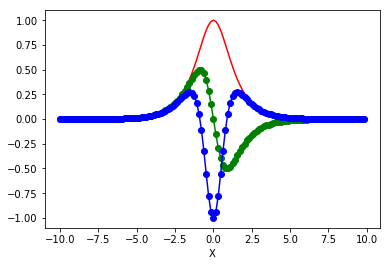

In [5]:
pylab.plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u2exact,'bo')
pylab.xlabel("X")

Text(0.5,0,'X')

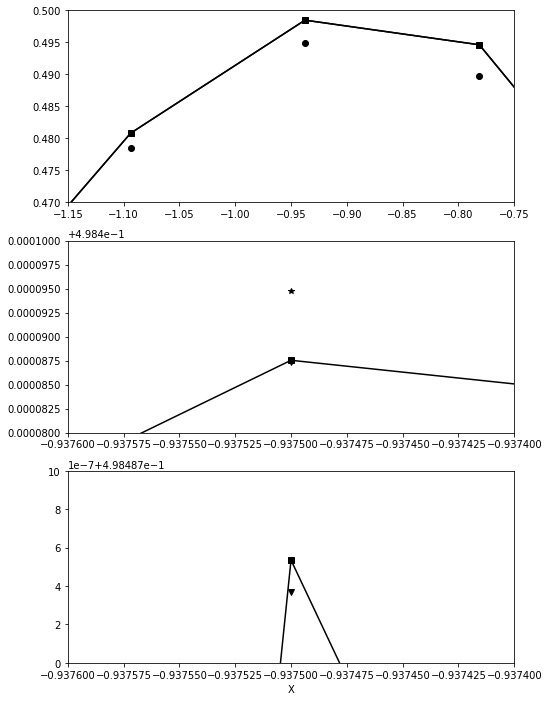

In [6]:
pylab.figure(figsize=(8,12))
pylab.subplot(3,1,1)
pylab.plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-1.15,-0.75])
pylab.ylim([0.47,0.5])
pylab.subplot(3,1,2)
pylab.plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-0.9376,-0.9374])
pylab.ylim([0.49848,0.49850])
pylab.subplot(3,1,3)
pylab.plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-0.9376,-0.9374])
pylab.ylim([0.498487,0.498488])
pylab.xlabel("X")

Comparación de precisión entre los métodos de diferencias finitas de segundo y cuarto orden y el método de FFT espectral para calcular la primera derivada. Tenga en cuenta que al usar el comando axis, la solución exacta (línea) y sus aproximaciones se pueden ampliar cerca de un punto de interés arbitrario. Aquí, la figura superior muestra que el método de diferencia finita (círculos) de segundo orden está dentro de O (10-2) de la derivada exacta. La diferencia finita de cuarto orden (estrella) está dentro de O (10-5) de la derivada exacta. Finalmente, el método de FFT está dentro de O (10-6) de la derivada exacta. Esto demuestra la propiedad de precisión espectral del algoritmo de FFT.

### 12.2 Aplicación FFT: Detección de radar y filtrado

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


(-10, 10)

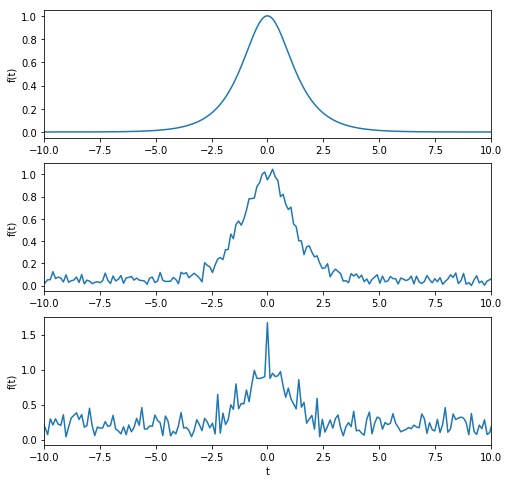

In [7]:
L=30
#Se define el número de modos de Fourier 2^9
n=512

t2=np.linspace(-L,L,n+1)
t=t2[0:n]
cosh=np.cosh(t)
sech=1/cosh
positivo=np.linspace(0,n/(2-1),n/2)
negativo=np.linspace(-n/2,-1,n/2)
k_1=(2*np.pi/L)*positivo
k_2=(2*np.pi/L)*negativo
k=np.concatenate((k_1,k_2))
u=sech
noise=1
noise2=5
ut=np.fft.fft(u)
utn=ut+noise*(np.random.randn(1,n))+1j*((np.random.randn(1,n)))
utn2=ut+noise2*(np.random.randn(1,n))+1j*((np.random.randn(1,n)))
un=np.fft.ifft(utn)
un2=np.fft.ifft(utn2)

pylab.figure(figsize=(8,8))
pylab.subplot(3,1,1)
pylab.ylabel ("f(t)")
pylab.plot(t,u)
pylab.xlim([-10,10])
pylab.subplot(3,1,2)
pylab.ylabel ("f(t)")
pylab.plot(t,abs(un)[0])
pylab.xlim([-10,10])
pylab.subplot(3,1,3)
pylab.xlabel("t")
pylab.ylabel ("f(t)")
pylab.plot(t,abs(un2)[0])
pylab.xlim([-10,10])

El pulso en el dominio del tiempo ideal (a) junto con dos realizaciones del pulso con el aumento de la intensidad del ruido (b) y (c). Las señales ruidosas son lo que típicamente se espera en las aplicaciones.

Text(0,0.5,'|ut|/max(|ut|)')

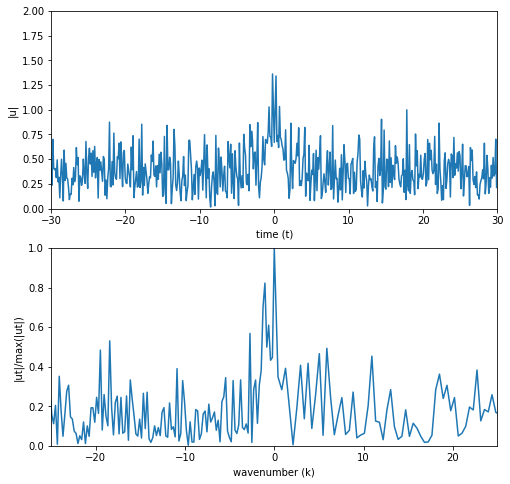

In [8]:
noise=10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.randn(n))+1j*((np.random.randn(n)))
un=np.fft.ifft(unt)
shiftk=np.fft.fftshift(k)
shiftunt=np.fft.fftshift(unt)

pylab.figure(figsize=(8,8))
pylab.subplot(2,1,1)
pylab.plot(t,abs(un))
pylab.xlim([-30,30])
pylab.ylim([0,2])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')

pylab.subplot(2,1,2)
pylab.plot(shiftk,abs(shiftunt)/max(abs(shiftunt)))
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')

Diagramas de dominio de tiempo (arriba) y dominio de frecuencia (abajo) para una sola realización de ruido blanco. En este caso, la intensidad del ruido ha aumentado a diez, enterrando así el campo de señal deseado tanto en tiempo como en frecuencia.

Text(0,0.5,'|u|')

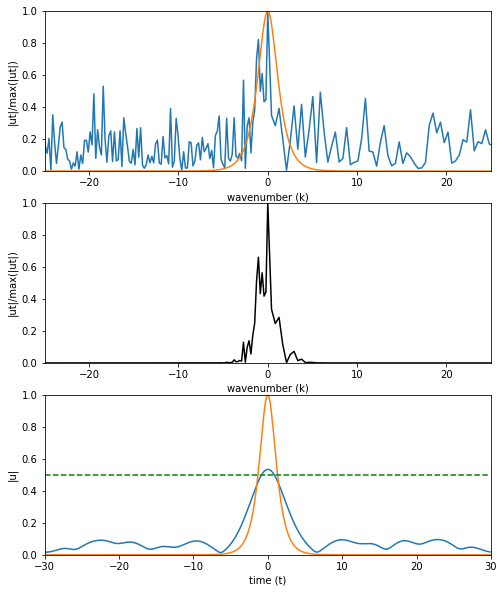

In [9]:
filtro=np.exp(-0.2*k**2)
unft=filtro*unt
unf=np.fft.ifft(unft)

pylab.figure(figsize=(8,10))
pylab.subplot(3,1,1)
pylab.plot(shiftk,abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))))
pylab.plot(t,u)
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')

pylab.subplot(3,1,2)
pylab.plot(shiftk,abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))),'k')
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')

pylab.subplot(3,1,3)
pylab.plot(t,abs(unf))
pylab.plot(t,abs(u))
pylab.plot(t,np.linspace(0.5,0.5,512),'--g')
pylab.xlim([-30,30])
pylab.ylim([0,1])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')

(arriba) Campo de señal inundado de ruido blanco en el dominio de frecuencia junto con un filtro gaussiano con parámetro de ancho de banda τ = 0.2 centrado en la frecuencia central de la señal. (medio) El campo de señal postfiltrado en el dominio de la frecuencia. (abajo) La reconstrucción en el dominio del tiempo del campo de señal (línea en azul) junto con el campo de señal ideal (línea de luz) y el umbral de detección del radar (línea de puntos).

Text(0,0.5,'|u|')

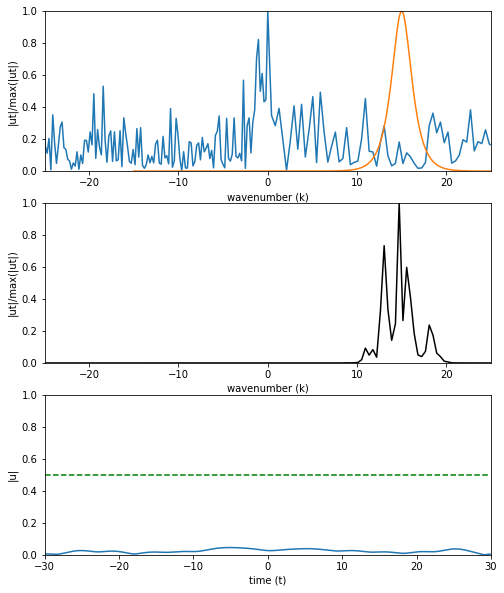

In [10]:
filtro=np.exp(-0.2*(k-15)**2)
unft=filtro*unt
unf=np.fft.ifft(unft)

pylab.figure(figsize=(8,10))
pylab.subplot(3,1,1)
pylab.plot(shiftk,abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))))
pylab.plot(t+15,u)
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')

pylab.subplot(3,1,2)
pylab.plot(shiftk,abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))),'k')
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')

pylab.subplot(3,1,3)
pylab.plot(t,abs(unf))
pylab.plot(t,np.linspace(0.5,0.5,512),'--g')
pylab.xlim([-30,30])
pylab.ylim([0,1])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')

(arriba) Campo de señal inundado de ruido blanco en el dominio de frecuencia junto con un filtro gaussiano con parámetro de ancho de banda τ = 0.2 centrado en la frecuencia de señal k = 15. (centro) Campo de señal postfiltrado en el dominio de frecuencia. (abajo) La reconstrucción en el dominio del tiempo del campo de señal (línea en azul) a lo largo del umbral de detección del radar (línea punteada).

### 12.3 Aplicación FFT: Detección de radar y promediado

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5,0,'frequency (k)')

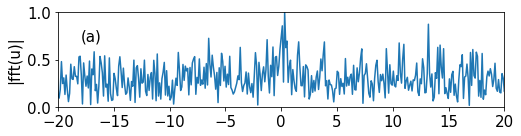

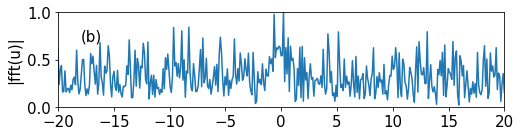

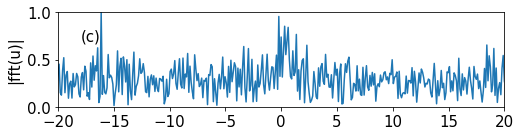

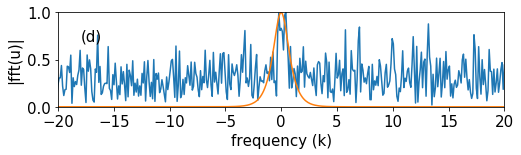

In [11]:
L=30 #% time slot
n=512 #% Fourier modes
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k_1=(2*np.pi/(2*L))*np.linspace(0,n/2-1,n/2)
k_2=(2*np.pi/(2*L))*np.linspace(-n/2,-1,n/2)
k=np.concatenate((k_1,k_2))
ks=np.fft.fftshift(k)
noise=10
labels=np.array(['(a)','(b)','(c)','(d)'])
realize=np.array([1, 2, 5, 100])
utn=[]
lon=[]
for jj in range(0,len(realize)):
    un=[]
    dat=[]
    cosh=np.cosh(t)
    sech=1/cosh
    u=sech
    ave=np.zeros(n)
    ut=np.fft.fft(u)
    utn_j=ut+noise*(np.random.randn(n)+1j*np.random.randn(n))
    while len(utn) < realize[jj]:
        utn.append(utn_j)
    for i in range(0,realize[jj]):
        ave=ave+utn[i]
        un_1=np.fft.ifft(utn[i])
        un.append(un_1)
        dat_1=abs(np.fft.fftshift(utn[i]))/max(abs(utn[i]))
        dat.append(dat_1)
        ave=abs(np.fft.fftshift(ave))/realize[jj]
    plt.figure(figsize=(8,8))
    matplotlib.rcParams.update({'font.size': 15})
    pylab.subplot(4,1,jj+1)
    pylab.plot(ks,ave/(max(ave)))
    pylab.axis([-20, 20, 0, 1])
    pylab.matplotlib.pyplot.annotate(labels[jj], xy=(-18, 0.7),fontsize=15)
    plt.ylabel('|fft(u)|', fontsize=15)
pylab.plot(ks,abs(np.fft.fftshift(ut))/max(abs(ut)))
matplotlib.rcParams.update({'font.size': 15})
plt.xlabel('frequency (k)')

Contenido espectral promedio para (a) uno, (b) dos, (c) cinco y (d) cien realizaciones de los datos. La línea naranja en (d) representa la firma espectral ideal, libre de ruido.

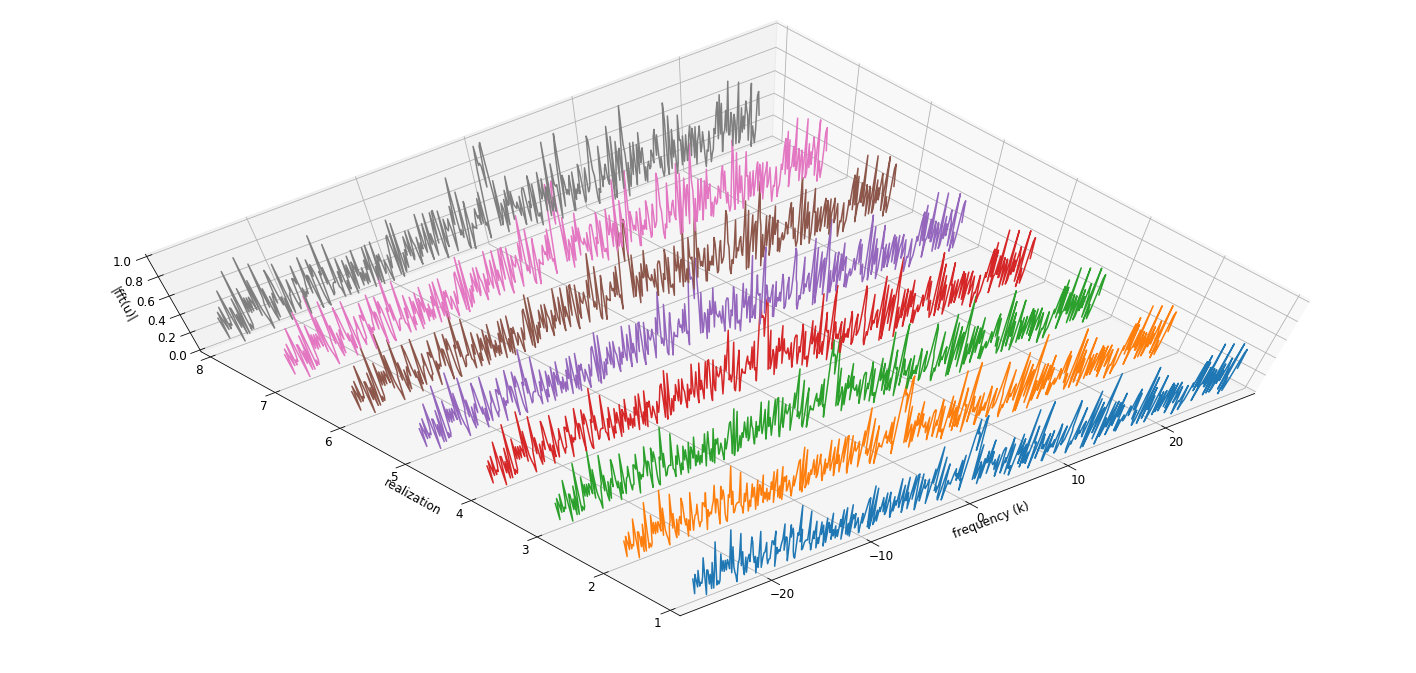

In [12]:
fig = plt.figure(figsize=(25,12))
matplotlib.rcParams['font.size'] = 12
ax = fig.gca(projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-28,28)
ax.set_ylim(1,8)
ax.set_zlim(0,1)
for a in range(0,8):
    X=ks
    Y=np.zeros(n)+(a+1)
    Z=dat[i]

    ax.plot(X,Y,Z)
ax.view_init(75,230)

Señales de dominio de tiempo típicas que se producirían en un sistema de detección de señal. En diferentes momentos de medición, el ruido blanco agregado podría alterar significativamente la señal de la señal.

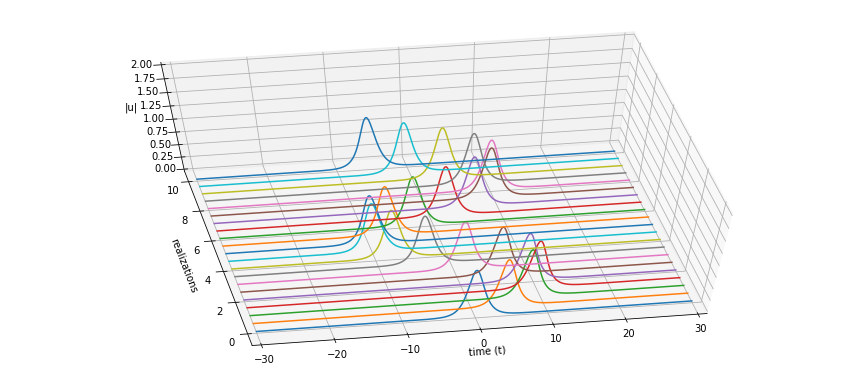

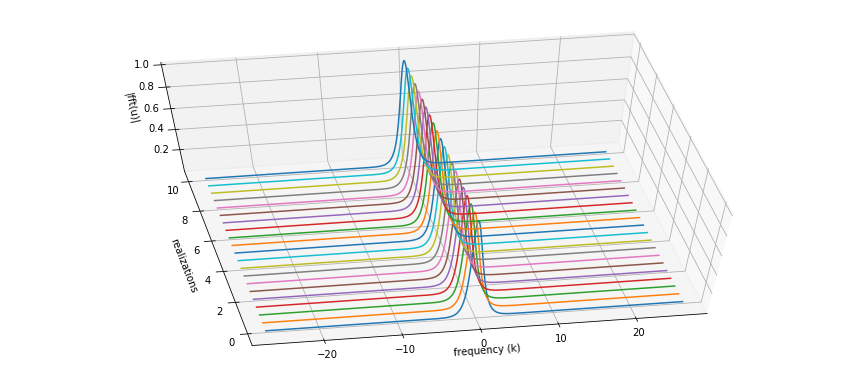

In [13]:
fig_1 = plt.figure(figsize=(15,15))
matplotlib.rcParams['font.size'] = 10
ax_1 = fig_1.add_subplot(2, 1, 1, projection='3d')
slice=np.linspace(0,10,21)
[T,S]=np.meshgrid(t,slice)
[K,S]=np.meshgrid(k,slice)
cosh=np.cosh((T-10*np.sin(S)))
sech=1/cosh
U=sech*np.exp(i*0*T)
ax_1.set_xlabel('time (t)')
ax_1.set_ylabel('realizations')
ax_1.set_zlabel('|u|')
ax_1.set_xlim(-30,30)
ax_1.set_zlim(0,2)
for b in range(0,len(slice)):
    X=T[b]
    Y=S[b]
    Z=U[b]
    ax_1.plot(X,Y,Z)
ax_1.view_init(60,260)
Ut=[]
Kp=[]
Utp=[]
Utn=[]
Utnp=[]
Un=[]
for j in range (0,len(slice)):
    Ut_1=np.fft.fft(U[j])
    Ut.append(Ut_1)
    Kp_1=np.fft.fftshift(K[j])
    Kp.append(Kp_1)
    Utp_1=np.fft.fftshift(Ut[j])
    Utp.append(Utp_1)
    Utn_1=Ut[j]+noise*(np.random.randn(n)+1j*np.random.randn(n))
    Utn.append(Utn_1)
    Utnp_1=np.fft.fftshift(Utn[j])/max(abs(Utn[j]))
    Utnp.append(Utnp_1)
    Un_1=np.fft.ifft(Utn[j])
    Un.append(Un_1)
fig_2 = plt.figure(figsize=(15,15))
matplotlib.rcParams['font.size'] = 10
ax_2 = fig_2.add_subplot(2, 1, 2, projection='3d')
ax_2.set_xlabel('frequency (k)')
ax_2.set_ylabel('realizations')
ax_2.set_zlabel('|fft(u)|')
ax_2.set_xlim(-28,28)
for b in range(0,len(slice)):
    X=Kp[b]
    Y=S[b]
    Z=abs(Utp[b])/max(abs(Utp[0]))

    ax_2.plot(X,Y,Z)
ax_2.view_init(60,260)

Comportamiento de tiempo-frecuencia ideal para un pulso en el dominio del tiempo que evoluciona dinámicamente en el tiempo. La firma espectral permanece sin cambios a medida que el pulso se mueve sobre el dominio del tiempo.

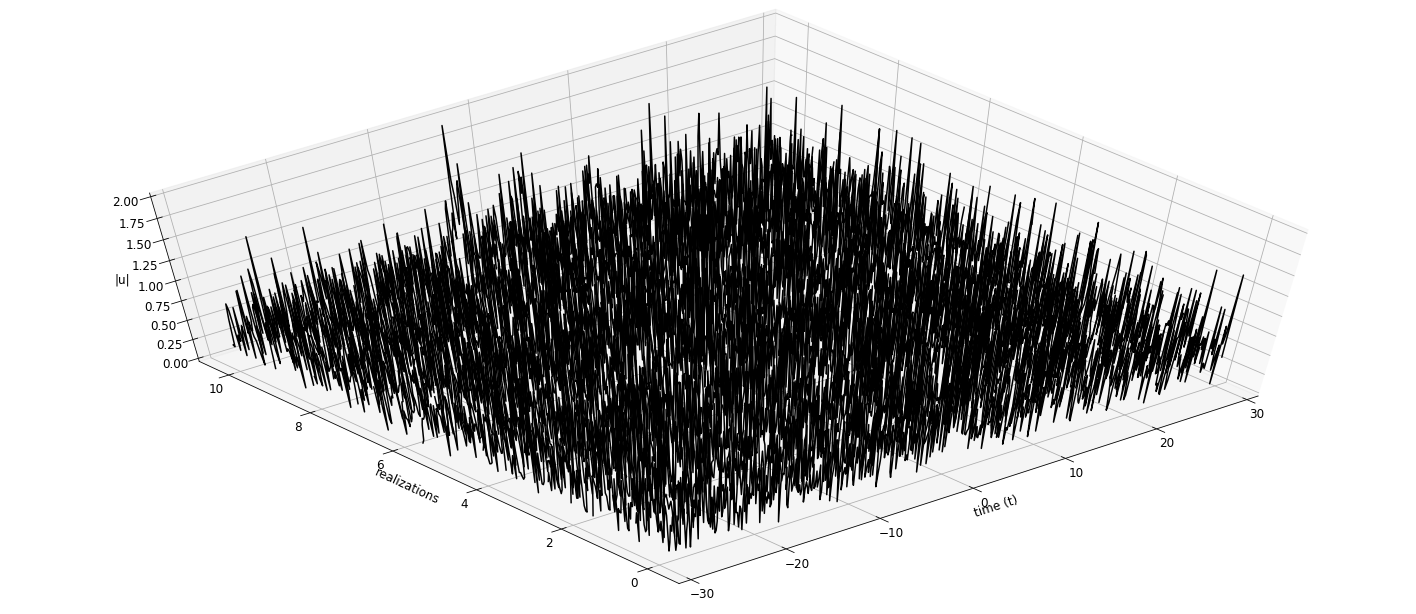

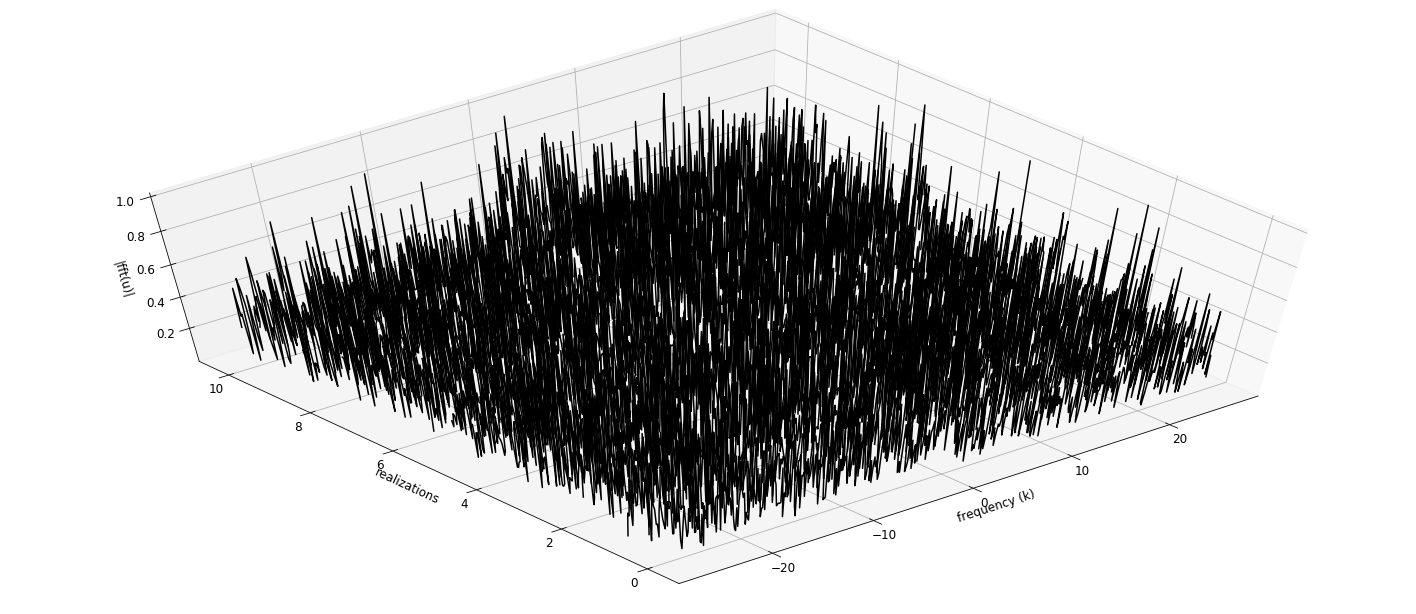

In [14]:
fig_3 = plt.figure(figsize=(25,24))
matplotlib.rcParams['font.size'] = 12
ax_3 = fig_3.add_subplot(2, 1, 1, projection='3d')
ax_3.set_xlabel('time (t)')
ax_3.set_ylabel('realizations')
ax_3.set_zlabel('|u|')
ax_3.set_xlim(-30,30)
ax_3.set_zlim(0,2)
for b in range(0,len(slice)):
    X=T[b]
    Y=S[b]
    Z=abs(Un[b])

    ax_3.plot(X,Y,Z,color='k')

ax_3.view_init(60,230)

fig_4 = plt.figure(figsize=(25,24))
matplotlib.rcParams['font.size'] = 12
ax_4 = fig_4.add_subplot(2, 1, 2, projection='3d')
ax_4.set_xlabel('frequency (k)')
ax_4.set_ylabel('realizations')
ax_4.set_zlabel('|fft(u)|')
ax_4.set_xlim(-28,28)
for b in range(0,len(slice)):
    X=Kp[b]
    Y=S[b]
    Z=abs(Utnp[b])

    ax_4.plot(X,Y,Z,color='k')
ax_4.view_init(60,230)

Una representación físicamente más realista del dominio del tiempo y el espectro de frecuencia como una función del número de realizaciones. El objetivo es extraer los datos significativos enterrados dentro del ruido.

Text(0,0.5,'|fft(u)|')

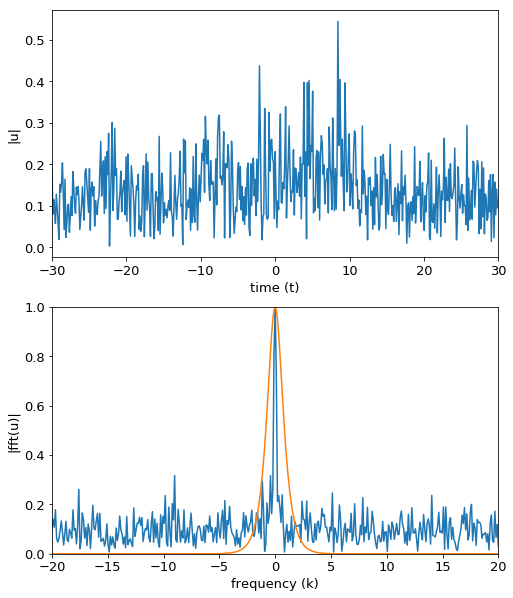

In [15]:
Uave=np.zeros(n) 
Utave=np.zeros(n)
for j in range(0,len(slice)):
    
    Uave=Uave+Un[j]
    Utave=Utave+Utn[j]
    
Uave=Uave/len(slice)
Utave=np.fft.fftshift(Utave)/len(slice)
plt.figure(figsize=(8,10))
matplotlib.rcParams.update({'font.size': 13})
pylab.subplot(2,1,1)
pylab.plot(t,abs(Uave))
pylab.xlabel('time (t)')
pylab.ylabel('|u|')
pylab.xlim(-30,30)
pylab.subplot(2,1,2)
pylab.plot(ks,abs(Utave)/max(abs(Utave)))
pylab.plot(ks,abs(np.fft.fftshift(Ut[0])/max(abs(Ut[0]))),[2])
pylab.axis([-20, 20, 0, 1])
pylab.xlabel('frequency (k)')
pylab.ylabel('|fft(u)|')

Promedio de dominio de tiempo y perfiles espectrales para las 21 realizaciones de los datos mostrados en la figura previa. Incluso con un muestreo limitado, se extrae la firma espectral en la frecuencia central.